In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
a={
    'Area':[1200,1500,1800,2200,2600],
    'Price':[240000,290000,310000,400000,430000]}
df=pd.DataFrame(a)
X=df[['Area']]
y=df[['Price']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
p=model.predict(X_test)
print(p)
z=[[3000]]
p=model.predict(z)
print(p)

[[280654.20560748]]
[[495140.18691589]]


E:\setups\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
b={
    'Area':[1200,1500,1800,2200,2600],
    'Bedrooms':[2,3,3,4,4],
    'pc':['Low','Low','Medium','Medium','High']
}
df=pd.DataFrame(b)
X=df[['Area','Bedrooms']]
y=df['pc']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
p=knn.predict(X_test)
print(p)

['Medium']


In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
c={
    'Area':[1200,1500,1800,2200,2600],
    'Bedrooms':[2,3,3,4,4]
}
df=pd.DataFrame(c)
X=df[['Area','Bedrooms']]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
print(X_scaled)

n=3
kmeans=KMeans(n)
df['Cluster']=kmeans.fit_predict(X_scaled)
print(df) 

[[-1.32960789 -1.60356745]
 [-0.72524067 -0.26726124]
 [-0.12087344 -0.26726124]
 [ 0.68494952  1.06904497]
 [ 1.49077248  1.06904497]]
   Area  Bedrooms  Cluster
0  1200         2        2
1  1500         3        0
2  1800         3        0
3  2200         4        1
4  2600         4        1


E:\setups\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


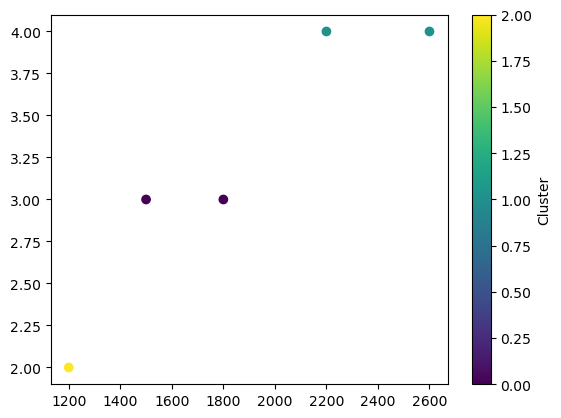

In [55]:
plt.scatter(df['Area'],df['Bedrooms'],c=df['Cluster'])
plt.colorbar(label='Cluster')
plt.show()

In [6]:
#19
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

a=pd.read_csv('house.csv')
X=a[['area','bedrooms','stories']]
y=a['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
p=model.predict(X_test)
mae= mean_absolute_error(y_test,p)
mse= mean_squared_error(y_test,p)
rmse=np.sqrt(mse)
print(mae,mse,rmse)

1230704.9331823809 2784597954908.523 1668711.4654452768


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

b=pd.read_csv('loan.csv')
print(b.isnull().sum())

encoded=pd.get_dummies(b,drop_first=True)
X=encoded.drop('Loan_Status',axis=1)
y=encoded['Loan_Status']

print(pd.DataFrame(X).isnull().sum())

imputer=SimpleImputer(strategy='mean')
Ximputed=imputer.fit_transform(X)

print(pd.DataFrame(Ximputed).isnull().sum())
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
precision=precision_score(y_test,y_pred)
print(precision)
recall=recall_score(y_test,y_pred)
print(recall)
f1=f1_score(y_test,y_pred)
print(f1)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


KeyError: "['Loan_Status'] not found in axis"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear